<h1><center>Analysis of S&P 500</center></h1>
<h3><center>Ken Dong</center></h3>

### Introduction:

The S&P 500, also known as the Standard & Poor's 500, is one of the largest stock market index funds in America. It tracks the performance of 500 of the largest publicly traded companies in America. With its diversity in different areas of industries such as technology, finance, energy, etc., it is one of the most reliable methods investors make returns on their money. As this is a very simplified description of the S&P 500, for more information read [here](https://www.investopedia.com/terms/s/sp500.asp).

Although many people already know how reliable the S&P 500 is on investment returns, it will still be informative to do a deeper dive and analyze how the S&P 500 trends have looked throughout history and what caused them. I will be using the historical data of the index fund and parsing through it to obtain relevant information to perform data analysis and obtain relevant information such as average returns and standard deviations per year and throughout history. I will also be comparing the performance of the S&P 500 to the context of its time, such as the inflation rate of America, GDP, and unemployment rate during that year. This will give a better understanding of the causes of the S&P 500 changes. 

The purpose of this tutorial is to walk through the data science pipeline of data collection, data processing, exploratory data analysis, hypothesis testing, and interpretation of results, all while giving insight to readers into a helpful subject such as the characteristics and changes of the S&P 500.

### Data Collection
The first step to the data science process is deciding what datasets we will be using. The datasets that I chose for this tutorial includes the open, high, low, and closing price of the S&P 500 throughout the entire history since its creation, the individual companies that make up the S&P 500 and their individual information such as industry and market cap, and lastly the environmental factors of America which include inflation rate, GDP, and unemployment rate of America.

The stock prices infomration can be found on [Kaggle](https://www.kaggle.com/) while America's economic information can be found on [World Bank](https://data.worldbank.org/), though I will be downloading and storing them as csv's so that my code can access the data.

To perform data analysis on the data, here are some useful libraries that I will be using throughout this tutorial.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

The main library that I will be using the read and store the information will be Pandas. Pandas provides an efficient way to convert the data into dataframes and provides several methods to manipulate and obtain the data that we need to use for the data analysis.

In [15]:
prices = pd.read_csv("prices.csv")
companies = pd.read_csv("companies.csv")
inflation = pd.read_csv("inflation.csv")
usa = pd.read_csv("USA.csv")
usa

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,United States,USA,Regulatory Quality: Percentile Rank,RQ.PER.RNK,NaN,NaN,NaN,NaN,NaN,NaN,...,88.942307,85.238098,91.904762,92.857140,92.857140,89.047623,87.142860,90.476189,91.037735,NaN
1,United States,USA,"Rule of Law: Percentile Rank, Upper Bound of 9...",RL.PER.RNK.UPPER,NaN,NaN,NaN,NaN,NaN,NaN,...,94.230766,96.190475,97.142860,98.095238,94.761902,92.857140,91.428574,93.333336,92.924530,NaN
2,United States,USA,Rule of Law: Estimate,RL.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,1.606930,1.562773,1.580512,1.607385,1.475687,1.424035,1.335382,1.390642,1.371688,NaN
3,United States,USA,Political Stability and Absence of Violence/Te...,PV.PER.RNK.LOWER,NaN,NaN,NaN,NaN,NaN,NaN,...,57.619049,57.619049,48.571430,42.380951,49.528301,39.622643,33.490566,33.018867,31.132076,NaN
4,United States,USA,Coverage of social insurance programs in riche...,per_si_allsi.cov_q5_tot,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,United States,USA,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,715.000000,715.000000,715.000000,715.000000,715.000000,...,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,NaN,NaN,NaN
1488,United States,USA,Land area where elevation is below 5 meters (%...,AG.LND.EL5M.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.455405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1489,United States,USA,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,127287.529500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1490,United States,USA,Arable land (hectares per person),AG.LND.ARBL.HA.PC,NaN,0.983336,0.949378,0.948912,0.927442,0.910948,...,0.490283,0.488388,0.486551,0.485162,0.482614,0.480422,0.475811,0.475066,NaN,NaN


### Data Processing
Now that we have the raw data stored as dataframes, we need to parse through the data to only keep the parts that we need for our exploratory data analysis. For this project we will be examining the performance of the S&P 500 through the time period 1960-2020. This provides a large enough time slot to observe the changes and trends of the index fund throughout American history while keeping it modern to keep it reflective of current market conditions.

In order to process the data, we need to drop the rows and columns that are unnecessary. For the prices dataframe, we need to drop the dates that are outside of the 1960-2020 timeframe by removing those rows. We also need to drop the close column, as we will be using the adj close column instead. The adj close is more accurate for reasons such as accounting for dividends and stock splits. For more information on adjusted close prices read [here](https://www.investopedia.com/terms/a/adjusted_closing_price.asp). For the companies dataframe, we are only interested in the name of the company, their industry sector, and their weight on the S&P 500. Therefore, we can drop every other column in the dataframe excluding those listed. For the inflation dataframe, since the data contains the inflation rates of every country and we are only interested in America's inflation rate, we can simply drop every other row excluding America. We also need to drop every column that's not the country name and inflation year. Lastly, for GDP and unemployment we need to find the rows that correspond to them and drop the columns outside of the date range.

Luckily, all five dataframes do not contain any missing data that will affect the data analysis so we can simply skip this step, though usually you would fill in these missing data with methods such as linear regression or using the mode.

By processing the data, these five dataframes are now much more compact and efficient. This will speed up our exploratory data analysis process and make it easier to keep track of the dataframes used by keeping only the relevant information.

In [16]:
# Processing prices dataframe
prices["Date"] = pd.to_datetime(prices["Date"])
start_date = '1/1/1960'
end_date = '12/31/2020'
prices = prices[(prices['Date'] >= start_date) & (prices['Date'] <= end_date)]
prices = prices.drop(columns=['Close'])
prices.head(10)

,Date,Open,High,Low,Adj Close,Volume
8007,1960-01-04,59.910000,59.910000,59.910000,59.910000,3990000
8008,1960-01-05,60.389999,60.389999,60.389999,60.389999,3710000
8009,1960-01-06,60.130001,60.130001,60.130001,60.130001,3730000
8010,1960-01-07,59.689999,59.689999,59.689999,59.689999,3310000
8011,1960-01-08,59.500000,59.500000,59.500000,59.500000,3290000
8012,1960-01-11,58.770000,58.770000,58.770000,58.770000,3470000
8013,1960-01-12,58.410000,58.410000,58.410000,58.410000,3760000
8014,1960-01-13,58.080002,58.080002,58.080002,58.080002,3470000
8015,1960-01-14,58.400002,58.400002,58.400002,58.400002,3560000
8016,1960-01-15,58.380001,58.380001,58.380001,58.380001,3400000


For the companies data frame, there needs to be further data processing compared to the other four dataframes. It would be beneficial to group the companies by their industry sector. We will then be able to see what percentage each industry contributes to the S&P 500, and which industries have higher and lower contributions. This will be helpful in analyzing how different industries shape the S&P 500.

In [17]:
# Processing companies dataframe
companies = companies[['Shortname', 'Weight', 'Sector']]
sector = companies.groupby('Sector').sum()
sector = sector.drop(columns=['Shortname'])
print(sector)
companies.head(10)

                          Weight
Sector                          
Basic Materials         0.019263
Communication Services  0.139537
Consumer Cyclical       0.100099
Consumer Defensive      0.062095
Energy                  0.035881
Financial Services      0.125179
Healthcare              0.113652
Industrials             0.075610
Real Estate             0.020669
Technology              0.284717
Utilities               0.023300


,Shortname,Weight,Sector
0,Microsoft Corporation,0.063104,Technology
1,Apple Inc.,0.058828,Technology
2,NVIDIA Corporation,0.045964,Technology
3,Alphabet Inc.,0.044105,Communication Services
4,Alphabet Inc.,0.044097,Communication Services
5,"Amazon.com, Inc.",0.038837,Consumer Cyclical
6,"Meta Platforms, Inc.",0.024186,Communication Services
7,Berkshire Hathaway Inc. New,0.018218,Financial Services
8,Eli Lilly and Company,0.014787,Healthcare
9,Broadcom Inc.,0.013065,Technology


For inflation, gdp, and unemployment, we will also need to transpose the dataframe so that the dates become the indices instead of the columns.

In [18]:
# Processing inflation dataframe
inflation = inflation[inflation["Country Name"] == "United States"]
inflation = inflation.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2021', '2022', '2023'])
inflation.set_index('Country Name', inplace=True)
inflation.index.name = "year"
inflation = inflation.T
inflation

year,United States
1960,1.457976
1961,1.070724
1962,1.198773
1963,1.239669
1964,1.278912
...,...
2016,1.261583
2017,2.130110
2018,2.442583
2019,1.812210


In [19]:
# Processing GDP dataframe
gdp = usa[usa["Indicator Name"] == "GDP"]
gdp = gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2021', '2022', '2023'])
gdp.set_index('Country Name', inplace=True)
gdp.index.name = "year"
gdp = gdp.T
gdp

year,United States
1960,5.430000e+11
1961,5.630000e+11
1962,6.050000e+11
1963,6.390000e+11
1964,6.860000e+11
...,...
2016,1.870000e+13
2017,1.950000e+13
2018,2.050000e+13
2019,2.140000e+13


In [20]:
# Processing unemployment rate dataframe
unemployment = usa[usa["Indicator Name"] == "Unemployment"]
unemployment = unemployment.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2021', '2022', '2023'])
unemployment.set_index('Country Name', inplace=True)
unemployment.index.name = "year"
unemployment = unemployment.T
unemployment

year,United States
1960,5.500
1961,6.700
1962,5.500
1963,5.700
1964,5.200
...,...
2016,4.869
2017,4.355
2018,3.896
2019,3.669


### Exploratory Data Analysis
Now that we have the data we need and formatted, we can visualize the data into graphs to study the trends of the S&P 500 and specific characteristics such as industry weights.

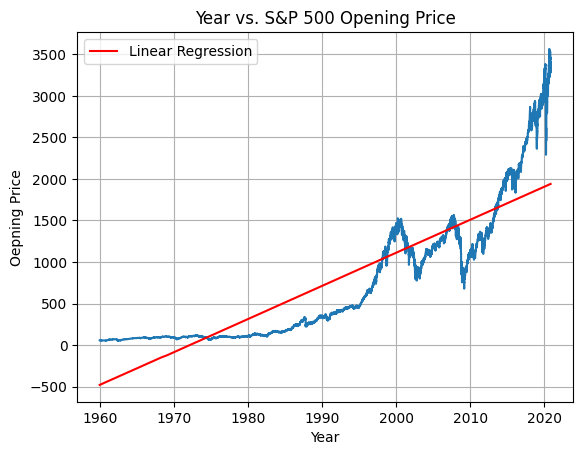

Opening Slope is:  0.15795634498371214


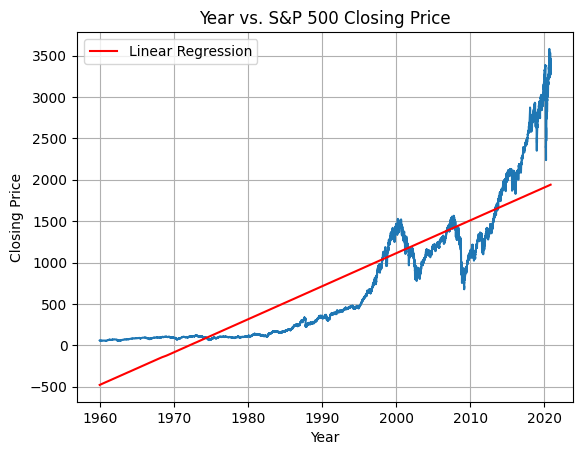

Closing Slope is:  0.15798122865899425


In [21]:
# Plotting Prices of S&P 500
plt.xlabel('Year')
plt.ylabel('Oepning Price')
plt.title('Year vs. S&P 500 Opening Price')
plt.plot(prices['Date'], prices['Open'])
coefficients = np.polyfit(prices['Date'].index, prices['Open'], 1)
poly_function = np.poly1d(coefficients)
plt.plot(prices['Date'], poly_function(prices['Date'].index), label='Linear Regression', color='red')
plt.legend()
plt.grid(True)
plt.show()

slope = coefficients[0]
print("Opening Slope is: ", slope)

# Plotting Prices of S&P 500
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Year vs. S&P 500 Closing Price')
plt.plot(prices['Date'], prices['Adj Close'])
coefficients = np.polyfit(prices['Date'].index, prices['Adj Close'], 1)
poly_function = np.poly1d(coefficients)
plt.plot(prices['Date'], poly_function(prices['Date'].index), label='Linear Regression', color='red')
plt.legend()
plt.grid(True)
plt.show()

slope = coefficients[0]
print("Closing Slope is: ", slope)



From the graph and linear regression line fitted to it, there is clearly and upward trend of the S&P 500 from 1960-2020, which confirms why investors choose this index fund as a way to have high returns.

Now that we have the weights of each sector, it will be easier to see them relative to one another if we graph them using a bar and pie chart.

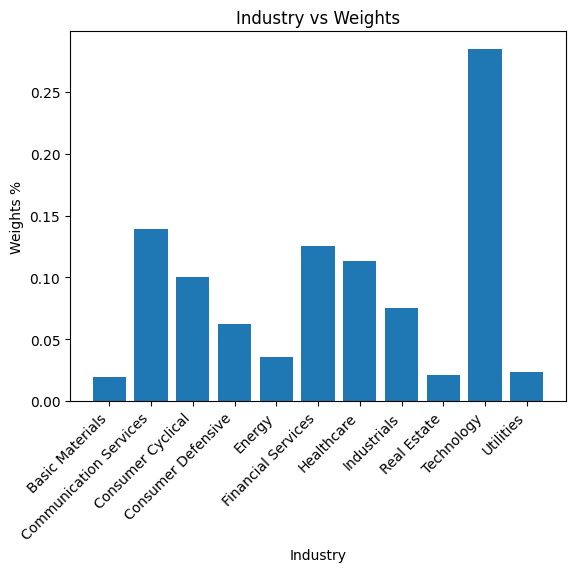

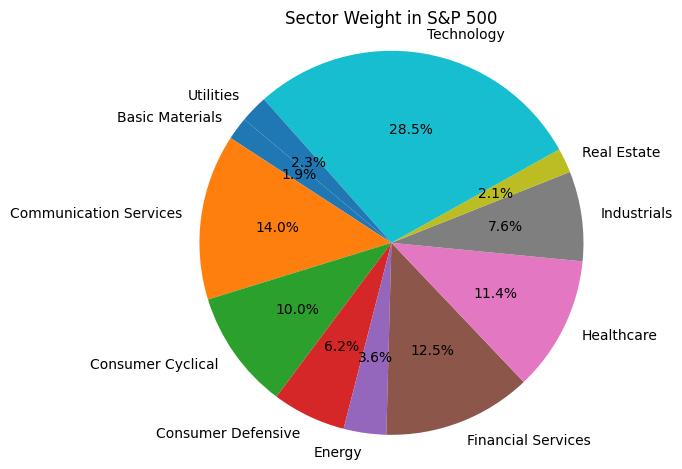

In [22]:
# Plotting Industry Sector Weights Bar plot
plt.xlabel('Industry')
plt.ylabel('Weights %')
plt.title('Industry vs Weights')
plt.bar(sector.index, sector["Weight"])
plt.xticks(rotation=45, ha='right')

plt.show()

# Plotting Industry Sector Weights Pie plot
plt.pie(sector["Weight"], labels=sector.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Sector Weight in S&P 500')
plt.tight_layout()
plt.show()

From these graphs you can observe that the technology, communication, healthcare, and financial services make up the largest weights in the S&P 500 while basical materials, utilities, and real estate make up a small proportion.

In [23]:
tech = companies[companies["Sector"] == "Technology"]
communication =  companies[companies["Sector"] == "Communication Services"]
finance = companies[companies["Sector"] == "Financial Services"]
print(tech.head(5))
print(communication.head(5))
print(finance.head(5))

                Shortname    Weight      Sector
0   Microsoft Corporation  0.063104  Technology
1              Apple Inc.  0.058828  Technology
2      NVIDIA Corporation  0.045964  Technology
9           Broadcom Inc.  0.013065  Technology
21     Oracle Corporation  0.006859  Technology
               Shortname    Weight                  Sector
3          Alphabet Inc.  0.044105  Communication Services
4          Alphabet Inc.  0.044097  Communication Services
6   Meta Platforms, Inc.  0.024186  Communication Services
28         Netflix, Inc.  0.005408  Communication Services
39     T-Mobile US, Inc.  0.003883  Communication Services
                      Shortname    Weight              Sector
7   Berkshire Hathaway Inc. New  0.018218  Financial Services
10        JP Morgan Chase & Co.  0.011883  Financial Services
11                    Visa Inc.  0.011580  Financial Services
16      Mastercard Incorporated  0.008645  Financial Services
23  Bank of America Corporation  0.006208  Finan

Furthermore, by seperating the companies data into their individual sectors you can list and see the top companies from the top 3 largest sectors technology, communication, and finance. You can see familiar names such as Microsoft, Apple, Alphabet, Netflix, and Berkshire that make up a large majority of the S&P 500 total market cap.

Although we have the continual graph for the entire period, investors might like to see the changes and variance between individual years. This could provide better representation for the risk tolerance of investors by seeing how price can fluctuate on a yearly basis.

To do this, we will need to group the dates into their years, and then calcuate the change and variance for each individual year.

C:\Users\Ken\AppData\Local\Temp\ipykernel_26892\140419265.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  priceByYear = prices.groupby('Year').apply(priceChange)


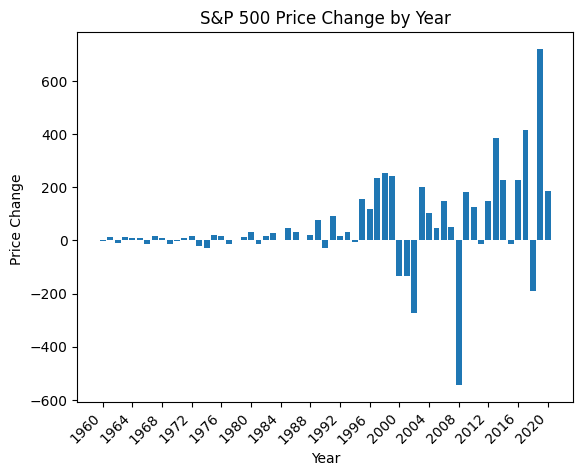

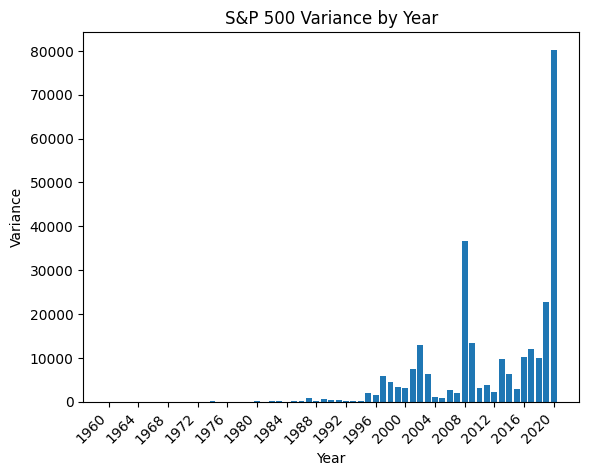

In [24]:
# Adding new column for years
prices['Year'] = prices['Date'].dt.year
def priceChange(group):
    earliest_price = group.iloc[0]['Adj Close']
    latest_price = group.iloc[-1]['Adj Close']
    price_difference = latest_price - earliest_price
    return price_difference

# Calcuating price change by year
priceByYear = prices.groupby('Year').apply(priceChange)

# Calculating variance by year
varianceByYear = prices.groupby('Year')['Adj Close'].var()

# Price Change Graph
plt.xlabel('Year')
plt.ylabel('Price Change ')
plt.title('S&P 500 Price Change by Year')
plt.bar(priceByYear.index, priceByYear)
plt.xticks(varianceByYear.index[::4], rotation=45, ha='right')
plt.show()

# Variance Graph
plt.xlabel('Year')
plt.ylabel('Variance')
plt.title('S&P 500 Variance by Year')
plt.bar(varianceByYear.index, varianceByYear)
plt.xticks(varianceByYear.index[::4], rotation=45, ha='right')

plt.show()

From the first graph, you can see max gains of 600 in 2019 and also max losses of almost 600 in 2008. 2008's losses are explained by the 2008 stock market crash which you can learn more about [here](https://www.investopedia.com/articles/economics/09/subprime-market-2008.asp)

From the second graph, you can see which years had the highest variance. It is evident that 2020 had by far the highest variance which is explained by covid's immense impact on the stock market, more information [here](https://www.forbes.com/sites/theyec/2023/02/10/the-aftermath-and-impact-of-covid-19-on-stock-markets/?sh=52dd6b14c120)

These two graphs provide more information to investors on the largest potential fluctations an investor can anticipate during one year.

### Environmental Variables that Affect S&P 500
Now that we have visualized characteristics of the S&P 500 itself, I would also like to research the causes of these changes. The environmental variables that I will be investigating include the inflation rate, America's GDP, and unemployment rate by year and we will be comparing it to the S&P 500 changes. 

First, we should visualize these economic variables to see how they compare to the S&P 500 graphs.

Inflation Slope: -0.05546774780803857


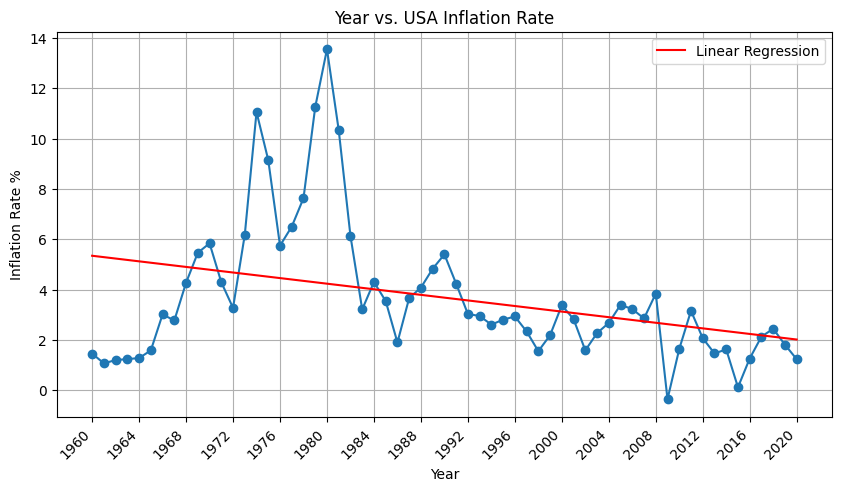

GDP Slope: 354280909571.6566


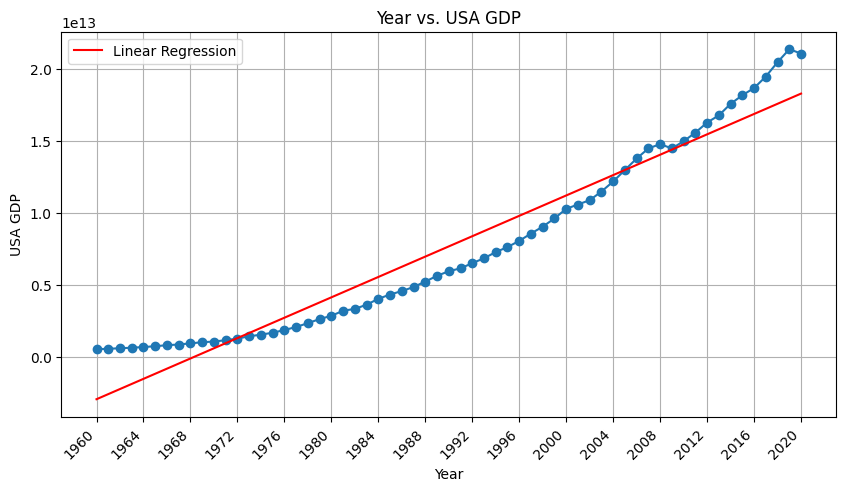

Unemployment Slope: 0.007865309360126856


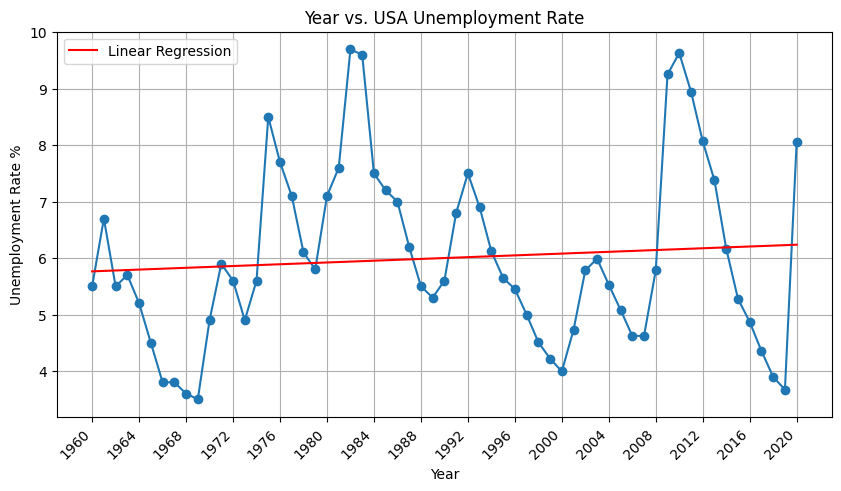

In [25]:
# Inflation Graph
inflation.index = pd.to_datetime(inflation.index, format='%Y').year
years = inflation.index
plt.figure(figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Inflation Rate %')
plt.title('Year vs. USA Inflation Rate')
plt.plot(years, inflation['United States'], marker='o')
coefficients = np.polyfit(years, inflation['United States'], 1)
poly_function = np.poly1d(coefficients)
plt.plot(years, poly_function(years), label='Linear Regression', color='red')
slope = coefficients[0]
print("Inflation Slope:" , slope)
plt.xticks(years[::4], rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# GDP Graph 
gdp.index = pd.to_datetime(gdp.index, format='%Y').year
years = gdp.index
plt.figure(figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('USA GDP')
plt.title('Year vs. USA GDP')
plt.plot(years, gdp['United States'], marker='o')
coefficients = np.polyfit(years, gdp['United States'], 1)
poly_function = np.poly1d(coefficients)
plt.plot(years, poly_function(years), label='Linear Regression', color='red')
slope = coefficients[0]
print("GDP Slope:" , slope)
plt.xticks(years[::4], rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# Unemployment Graph 
unemployment.index = pd.to_datetime(unemployment.index, format='%Y').year
years = unemployment.index
plt.figure(figsize=(10, 5))
plt.xlabel('Year')
plt.ylabel('Unemployment Rate %')
plt.title('Year vs. USA Unemployment Rate')
plt.plot(years, unemployment['United States'], marker='o')
coefficients = np.polyfit(years, unemployment['United States'], 1)
poly_function = np.poly1d(coefficients)
plt.plot(years, poly_function(years), label='Linear Regression', color='red')
slope = coefficients[0]
print("Unemployment Slope:" , slope)
plt.xticks(years[::4], rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

From these graphs you can see that there is a downward trend for USA inflation rate, an upward trend for USA GDP growth, and sporadic trend for USA unemployment rate with high variance.

### Hypothesis Testing
Now that we have visualized graphs for each individual variable as well as the dependent variable, the S&P 500 price, we wish to perform a hypothesis test on the relationship between the dependent and indepdent variables. In our hypothesis test, our null hypothesis will be no correlation between inflation/GDP/unemployment rate with S&P 500. If there were a correlation to be found through statistical testing, we would reject the null hypothesis. For more information on the hypothesis testing procedure read [here](https://www.investopedia.com/terms/h/hypothesistesting.asp)

Since the independent variables are yearly and the S&P 500 prices are daily, I will have to convert the S&P 500 prices to yearly. I decided that using the average closing price would be the best representation of each year's price as the index fund's closing price is a good indication of an index funds worth.

In [26]:
# Combine all independent and dependent variables into one dataframe
pricesByYear = prices.groupby('Year')['Adj Close'].mean()
combined = inflation
combined["gdp"] = gdp["United States"]
combined["unemployment"] = unemployment["United States"]
combined["prices"] = pricesByYear
combined.rename(columns={'United States': 'inflation'}, inplace=True)
combined.reset_index(inplace=True)

# Hypothesis Test for GDP
regression = ols(formula = "prices ~ gdp", data = combined).fit()
print(regression.summary())
print("P value for GDP" ,regression.pvalues.gdp)

# Hypothesis Test for Inflation
regression = ols(formula = "prices ~ inflation", data = combined).fit()
print(regression.summary())
print("P value for Inflation" ,regression.pvalues.inflation)

# Hypothesis Test for Unemployment
regression = ols(formula = "prices ~ unemployment", data = combined).fit()
print(regression.summary())
print("P value for Unemployment" ,regression.pvalues.unemployment)

                            OLS Regression Results                            
Dep. Variable:                 prices   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     584.5
Date:                Sat, 18 May 2024   Prob (F-statistic):           2.64e-32
Time:                        19:47:18   Log-Likelihood:                -421.39
No. Observations:                  61   AIC:                             846.8
Df Residuals:                      59   BIC:                             851.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -172.2257     49.047     -3.511      0.0

From the P values obtained from the [OLS Regression](http://www.statsmodels.org/stable/index.html), you can see there is a very strong likelihood for a correlation between America's GDP and inflation rate with the S&P 500 price, with p-values well below 0.01. Therefore we can reject the null hypothesis for GDP and inflation. However, the p-value obtained for the unemployment rate is .26, which is too high to reject the null hypothesis.

### Conclusion
From our exploratory data analysis and hypothesis testing on the S&P 500 index fund we have learned and confirmed several facts about the S&P 500 index fund. Firstly, it is obvious that there is a trend for the price to increase throughout history, which makes sense as this index fund is a popular method for people to invest and grow their money. We also learned that 2008 and 2019 experienced the most drastic price changes, with the former being negative and the latter being positive. Tech appears to make up a large majority of the market cap, with it totaling over 28% of its total value. Economic factors such as inflation rate and the GDP of America are heavily correlated with the index fund's price, with it increasing when inflation rates are low and GDP being high.

With how important investing is for young adults, this data science tutorial aims to provide more context on the characteristics of one of the most popular investment vehicles used by Americans. It goes through the data science pipeline of gathering data and using said data to perform statistical analysis in determining relationships between different variables.

### Databases Used
https://data.worldbank.org/country/united-states?view=chart

https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks

https://www.kaggle.com/datasets/henryhan117/sp-500-historical-data
